<center><h1>Verbal Autopsy Clustering</h1></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import PorterStemmer
import seaborn as sb

<hr>

<h1>TF-IDF</h1>

<h2>Hold-Out</h2>

In [24]:
data = pd.read_csv("data_output/tf_idf.csv")
data.drop(data.columns[[0]], axis=1, inplace=True)
data.tail(5)

,abdomen,abdominal,able,accident,according,ache,administered,admission,admit,admitted,...,worsen,worsened,worst,wound,wrong,xray,year,yellow,yellowish,young
5204,0.242315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.132404,0.0,0.0,0.0
5205,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090137,0.0,0.0,0.0
5207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5208,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [25]:
dataB = pd.read_csv("data_output/preproceso.csv")
dataB.drop("Unnamed: 0", axis=1, inplace=True)
dataB.drop("open_response", axis=1, inplace=True)
dataB.drop("gs_text34", axis=1, inplace=True)
dataB.tail(5)


,module,age,sex,site
5204,0,42.0,1,5
5205,0,14.0,2,4
5206,0,80.0,2,5
5207,0,70.0,1,5
5208,0,30.0,1,2


In [26]:
dataF = pd.concat([dataB, data], axis=1,)
dataF.tail(5)

,module,age,sex,site,abdomen,abdominal,able,accident,according,ache,...,worsen,worsened,worst,wound,wrong,xray,year,yellow,yellowish,young
5204,0,42.0,1,5,0.242315,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.132404,0.0,0.0,0.0
5205,0,14.0,2,4,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5206,0,80.0,2,5,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090137,0.0,0.0,0.0
5207,0,70.0,1,5,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5208,0,30.0,1,2,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [27]:
values = pd.read_csv("data_output/preproceso.csv")
values = values.get(['gs_text34'],1)
values.tail(5)

,gs_text34
5204,"Endocrine, Nutritional and Metabolic Diseases"
5205,Other Infectious Diseases
5206,Diseases of Respiratory System
5207,Other Cardiovascular Diseases
5208,External Causes of Morbidity and Mortality


In [28]:
from sklearn.model_selection import train_test_split

#
# Create Training and Test Split
#
x_train_tf, x_test_tf, y_train_tf, y_test_tf = train_test_split(dataF, values, random_state=42, test_size=0.2)

In [29]:
x_train_tf.head(5)

,module,age,sex,site,abdomen,abdominal,able,accident,according,ache,...,worsen,worsened,worst,wound,wrong,xray,year,yellow,yellowish,young
45,0,48.0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3467,1,0.0,2,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2484,0,50.0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.174734,0.0,0.0,0.0
3703,2,0.0,1,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3379,0,63.0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.247879,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [30]:
y_train_tf.head(5)

,gs_text34
45,Neoplasms
3467,Diseases of Respiratory System
2484,"Endocrine, Nutritional and Metabolic Diseases"
3703,"Pregnancy, childbirth and the puerperiu"
3379,Other Cardiovascular Diseases


In [31]:
from sklearn.preprocessing import StandardScaler

# scalling the input data
sc_X = StandardScaler() 
x_train_tf = sc_X.fit_transform(x_train_tf)
x_test_tf = sc_X.fit_transform(x_test_tf)

<hr>

<h2>Baseline</h2>

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

In [33]:
print("We have {} unique classes".format(len(values["gs_text34"].unique())))
print("We have {} training samples".format(len(x_train_tf)))
print("We have {} test samples".format(len(x_test_tf)))

We have 18 unique classes
We have 4167 training samples
We have 1042 test samples


In [ ]:
from sklearn.naive_bayes import BernoulliNB

alpha = [0.0,1.0,2.0]
binarize = [0.0,1.0]
fit_prior = [True, False]

best = 0.0

for a in alpha:
    for b in binarize:
        for fp in fit_prior:
            # initializaing the NB
            classifer = BernoulliNB(alpha=a,binarize=b,fit_prior=fp)

            # training the model
            classifer.fit(x_train_tf, y_train_tf)

            # testing the model
            y_pred_tf = classifer.predict(x_test_tf)

            print(accuracy_score(y_pred_tf, y_test_tf))

            if accuracy_score(y_pred_tf, y_test_tf) > best:
                best = accuracy_score(y_pred_tf, y_test_tf)
                bestC = classifer
                bestPred = y_pred_tf

In [42]:
# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(bestPred, y_test_tf))

0.45201535508637236


<AxesSubplot: >

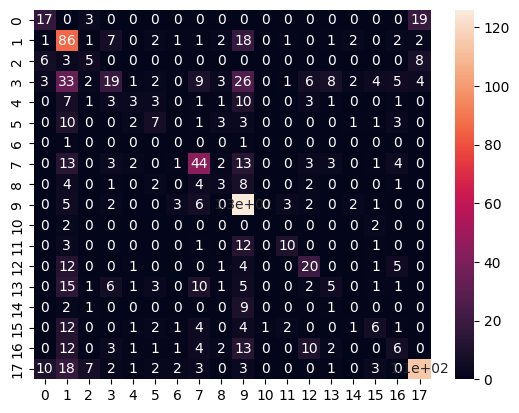

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test_tf, bestPred)

# true write data values in each cell of the matrix
sns.heatmap(cm, annot=True)

In [37]:
# importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test_tf, bestPred))

                                               precision    recall  f1-score   support

                               Birth asphyxia       0.46      0.44      0.45        39
    Certain infectious and Parasitic Diseases       0.36      0.68      0.47       127
                      Congenital malformation       0.24      0.23      0.23        22
               Diseases of Respiratory System       0.41      0.15      0.22       128
             Diseases of the Digestive System       0.23      0.09      0.13        34
         Diseases of the Genitourinary System       0.29      0.23      0.25        31
               Diseases of the Nervous System       0.00      0.00      0.00         2
           Diseases of the circulatory system       0.50      0.49      0.50        89
Endocrine, Nutritional and Metabolic Diseases       0.17      0.12      0.14        25
   External Causes of Morbidity and Mortality       0.49      0.84      0.62       150
                            Hemorrhagic fe

<hr>

<h2>Neural Network</h2>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score
import BayesianOptimization
from sklearn.model_selection import StratifiedKFold
from keras.layers import LeakyReLU
import numpy as np
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing
LeakyReLU = LeakyReLU(alpha=0.1)

2022-12-11 15:07:22.001390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 15:07:22.491709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-11 15:07:22.491767: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-11 15:07:24.943444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [46]:
layers = [(10,),(50,),(100,),(200,),(500,),(1000,),(2000,),(4000,)]

best = []
bestScore = 0

i = 1

resultados = {}


for hls in layers:

        print(i)
        print(hls)
        
        classifer = MLPClassifier(hidden_layer_sizes=hls, max_iter=5)
        classifer.fit(x_train_tf,y_train_tf)

        predictions = classifer.predict(x_test_tf)
        score = metrics.accuracy_score(y_test_tf, predictions)
        print("Mean accuracy of predictions:" + str(score))

        resultados[hls[0]] = score 
        
        i += 1

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions:0.4952015355086372
8
(4000,)


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions:0.4875239923224568


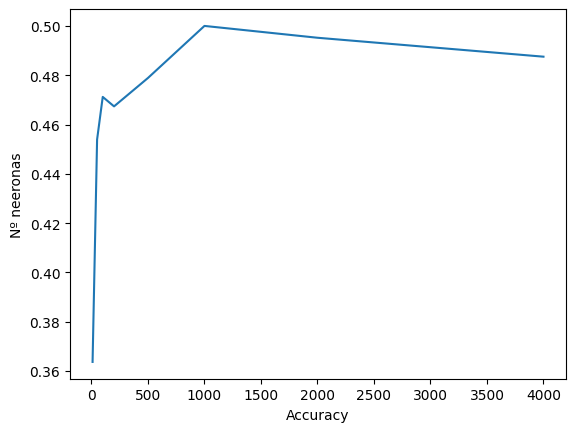

In [56]:
import matplotlib.pyplot as plt

plt.plot([*resultados],list(resultados.values()))
plt.xlabel('Accuracy')
plt.ylabel('Nº neeronas')
plt.show()

In [ ]:
layers = [(1000,),(1000,1000),(1000,1000,1000)]

best = []
bestScore = 0

i = 1

resultados = {}


for hls in layers:

        print(i)
        print(hls)
        
        classifer = MLPClassifier(hidden_layer_sizes=hls, max_iter=5)
        classifer.fit(x_train_tf,y_train_tf)

        predictions = classifer.predict(x_test_tf)
        score = metrics.accuracy_score(y_test_tf, predictions)
        print("Mean accuracy of predictions:" + str(score))

        resultados[i] = score 
        
        i += 1

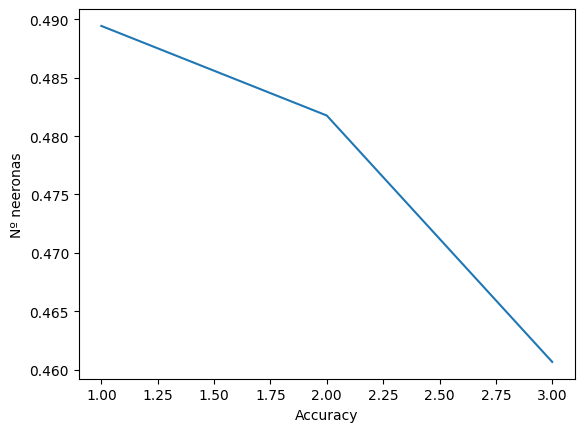

In [ ]:
import matplotlib.pyplot as plt

plt.plot([*resultados],list(resultados.values()))
plt.xlabel('Accuracy')
plt.ylabel('Nº capas')
plt.show()

In [ ]:
n_iters = [3,5,10,20]

best = []
bestScore = 0

i = 1

resultados = {}


for n in n_iters:

        print(i)
        
        classifer = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=n)
        classifer.fit(x_train_tf,y_train_tf)

        predictions = classifer.predict(x_test_tf)
        score = metrics.accuracy_score(y_test_tf, predictions)
        print("Mean accuracy of predictions:" + str(score))

        resultados[n] = score 
        
        i += 1

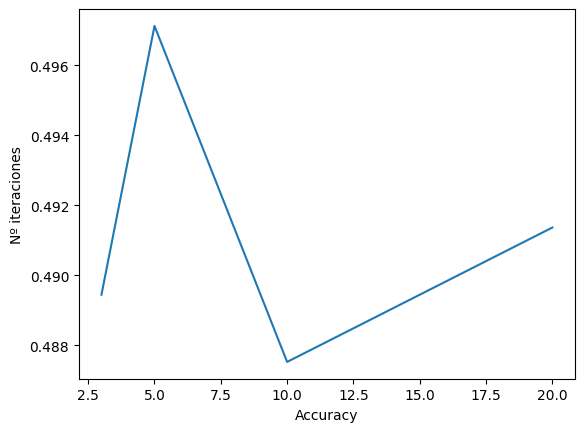

In [61]:
plt.plot([*resultados],list(resultados.values()))
plt.xlabel('Accuracy')
plt.ylabel('Nº iteraciones')
plt.show()

In [ ]:
layers = [(100,100),(100,),(200,100,100), (200,100,100,100)]
activation = ['relu','tanh']
solver = ['adam','lbfgs', 'sgd']
alpha = [0.0001]
learning_rate = ['constant','adaptive','invscaling']
learning_init = [0.001,0.01]
iteraciones = [3,5]

best = []
bestScore = 0

i = 1

for lri in learning_init:
    for a in activation:
        for s in solver:
            for alp in alpha:
                for lr in learning_rate:
                    for hls in layers:
                        for it in iteraciones:

                            print(i)
                            print([hls, a, s, alp, lr, lri, it])
                            
                            classifer = MLPClassifier(hidden_layer_sizes=hls, max_iter=it, activation=a, solver=s, random_state=762, alpha=alp, learning_rate=lr, learning_rate_init=lri)
                            classifer.fit(x_train_tf,y_train_tf)

                            predictions = classifer.predict(x_test_tf)
                            score = metrics.accuracy_score(y_test_tf, predictions)
                            print("Mean accuracy of predictions:" + str(score))

                            if score > bestScore:
                                best = [hls, a, s, alp, lr, lri, it]
                                bestScore = score
                            
                            i += 1


In [18]:
print('Best score: ' + str(bestScore))
print('Best params: ' + str(best))

Best score: 0.4923224568138196
Best params: [(200, 100, 100), 'tanh', 'adam', 0.0001, 'constant', 0.001, 3]


In [62]:
#Utilizando datos obtenidos con las graficas anteriores y a base de prueba y error he determinado que es siguiente clasificador es el mejor
classifer = MLPClassifier(hidden_layer_sizes=(4000, 2000, 100),verbose=10, max_iter=3, activation='tanh',random_state=762)
classifer.fit(x_train_tf,y_train_tf)

predictions = classifer.predict(x_test_tf)
score = metrics.accuracy_score(y_test_tf, predictions)
print("Mean accuracy of predictions: " + str(score))

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2.20535376
Iteration 2, loss = 0.91588866
Iteration 3, loss = 0.51631213


/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean accuracy of predictions: 0.4952015355086372


In [20]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test_tf, predictions)

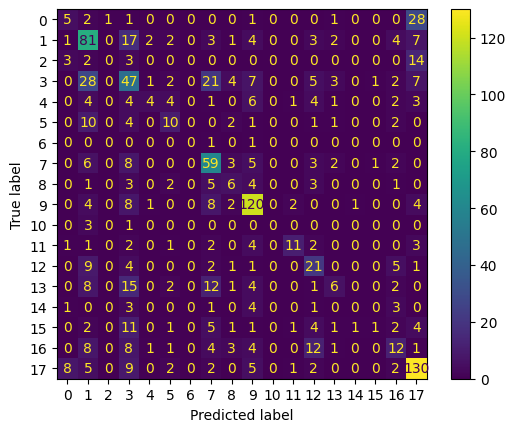

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix)
cm.plot()

In [22]:
classificationReport = classification_report(y_test_tf, predictions)
print(classificationReport)

                                               precision    recall  f1-score   support

                               Birth asphyxia       0.26      0.13      0.17        39
    Certain infectious and Parasitic Diseases       0.47      0.64      0.54       127
                      Congenital malformation       0.00      0.00      0.00        22
               Diseases of Respiratory System       0.32      0.37      0.34       128
             Diseases of the Digestive System       0.44      0.12      0.19        34
         Diseases of the Genitourinary System       0.37      0.32      0.34        31
               Diseases of the Nervous System       0.00      0.00      0.00         2
           Diseases of the circulatory system       0.47      0.66      0.55        89
Endocrine, Nutritional and Metabolic Diseases       0.25      0.24      0.24        25
   External Causes of Morbidity and Mortality       0.70      0.80      0.75       150
                            Hemorrhagic fe

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
